# TASK #1 : UNDERSTAND THE PROBLEM STATEMENT


Aim of the problem is to detect the presence or absence of cardiovascular disease in person based on the given features.
Features available are:


- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code |
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

Note that:
- Objective: factual information;
- Examination: results of medical examination;
- Subjective: information given by the patient.

Data Source:https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the csv file 
cardio_df = pd.read_csv("cardio_train.csv", sep=";")

In [3]:
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [4]:
# Drop id

cardio_df = cardio_df.drop(columns = 'id')

In [5]:
# since the age is given in days, we convert it into years

cardio_df['age'] = cardio_df['age']/365

In [6]:
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
# checking the null values
cardio_df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
# Checking the dataframe information

cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.4 MB


In [9]:
# Statistical summary of the dataframe
cardio_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# TASK #4: VISUALIZE DATASET

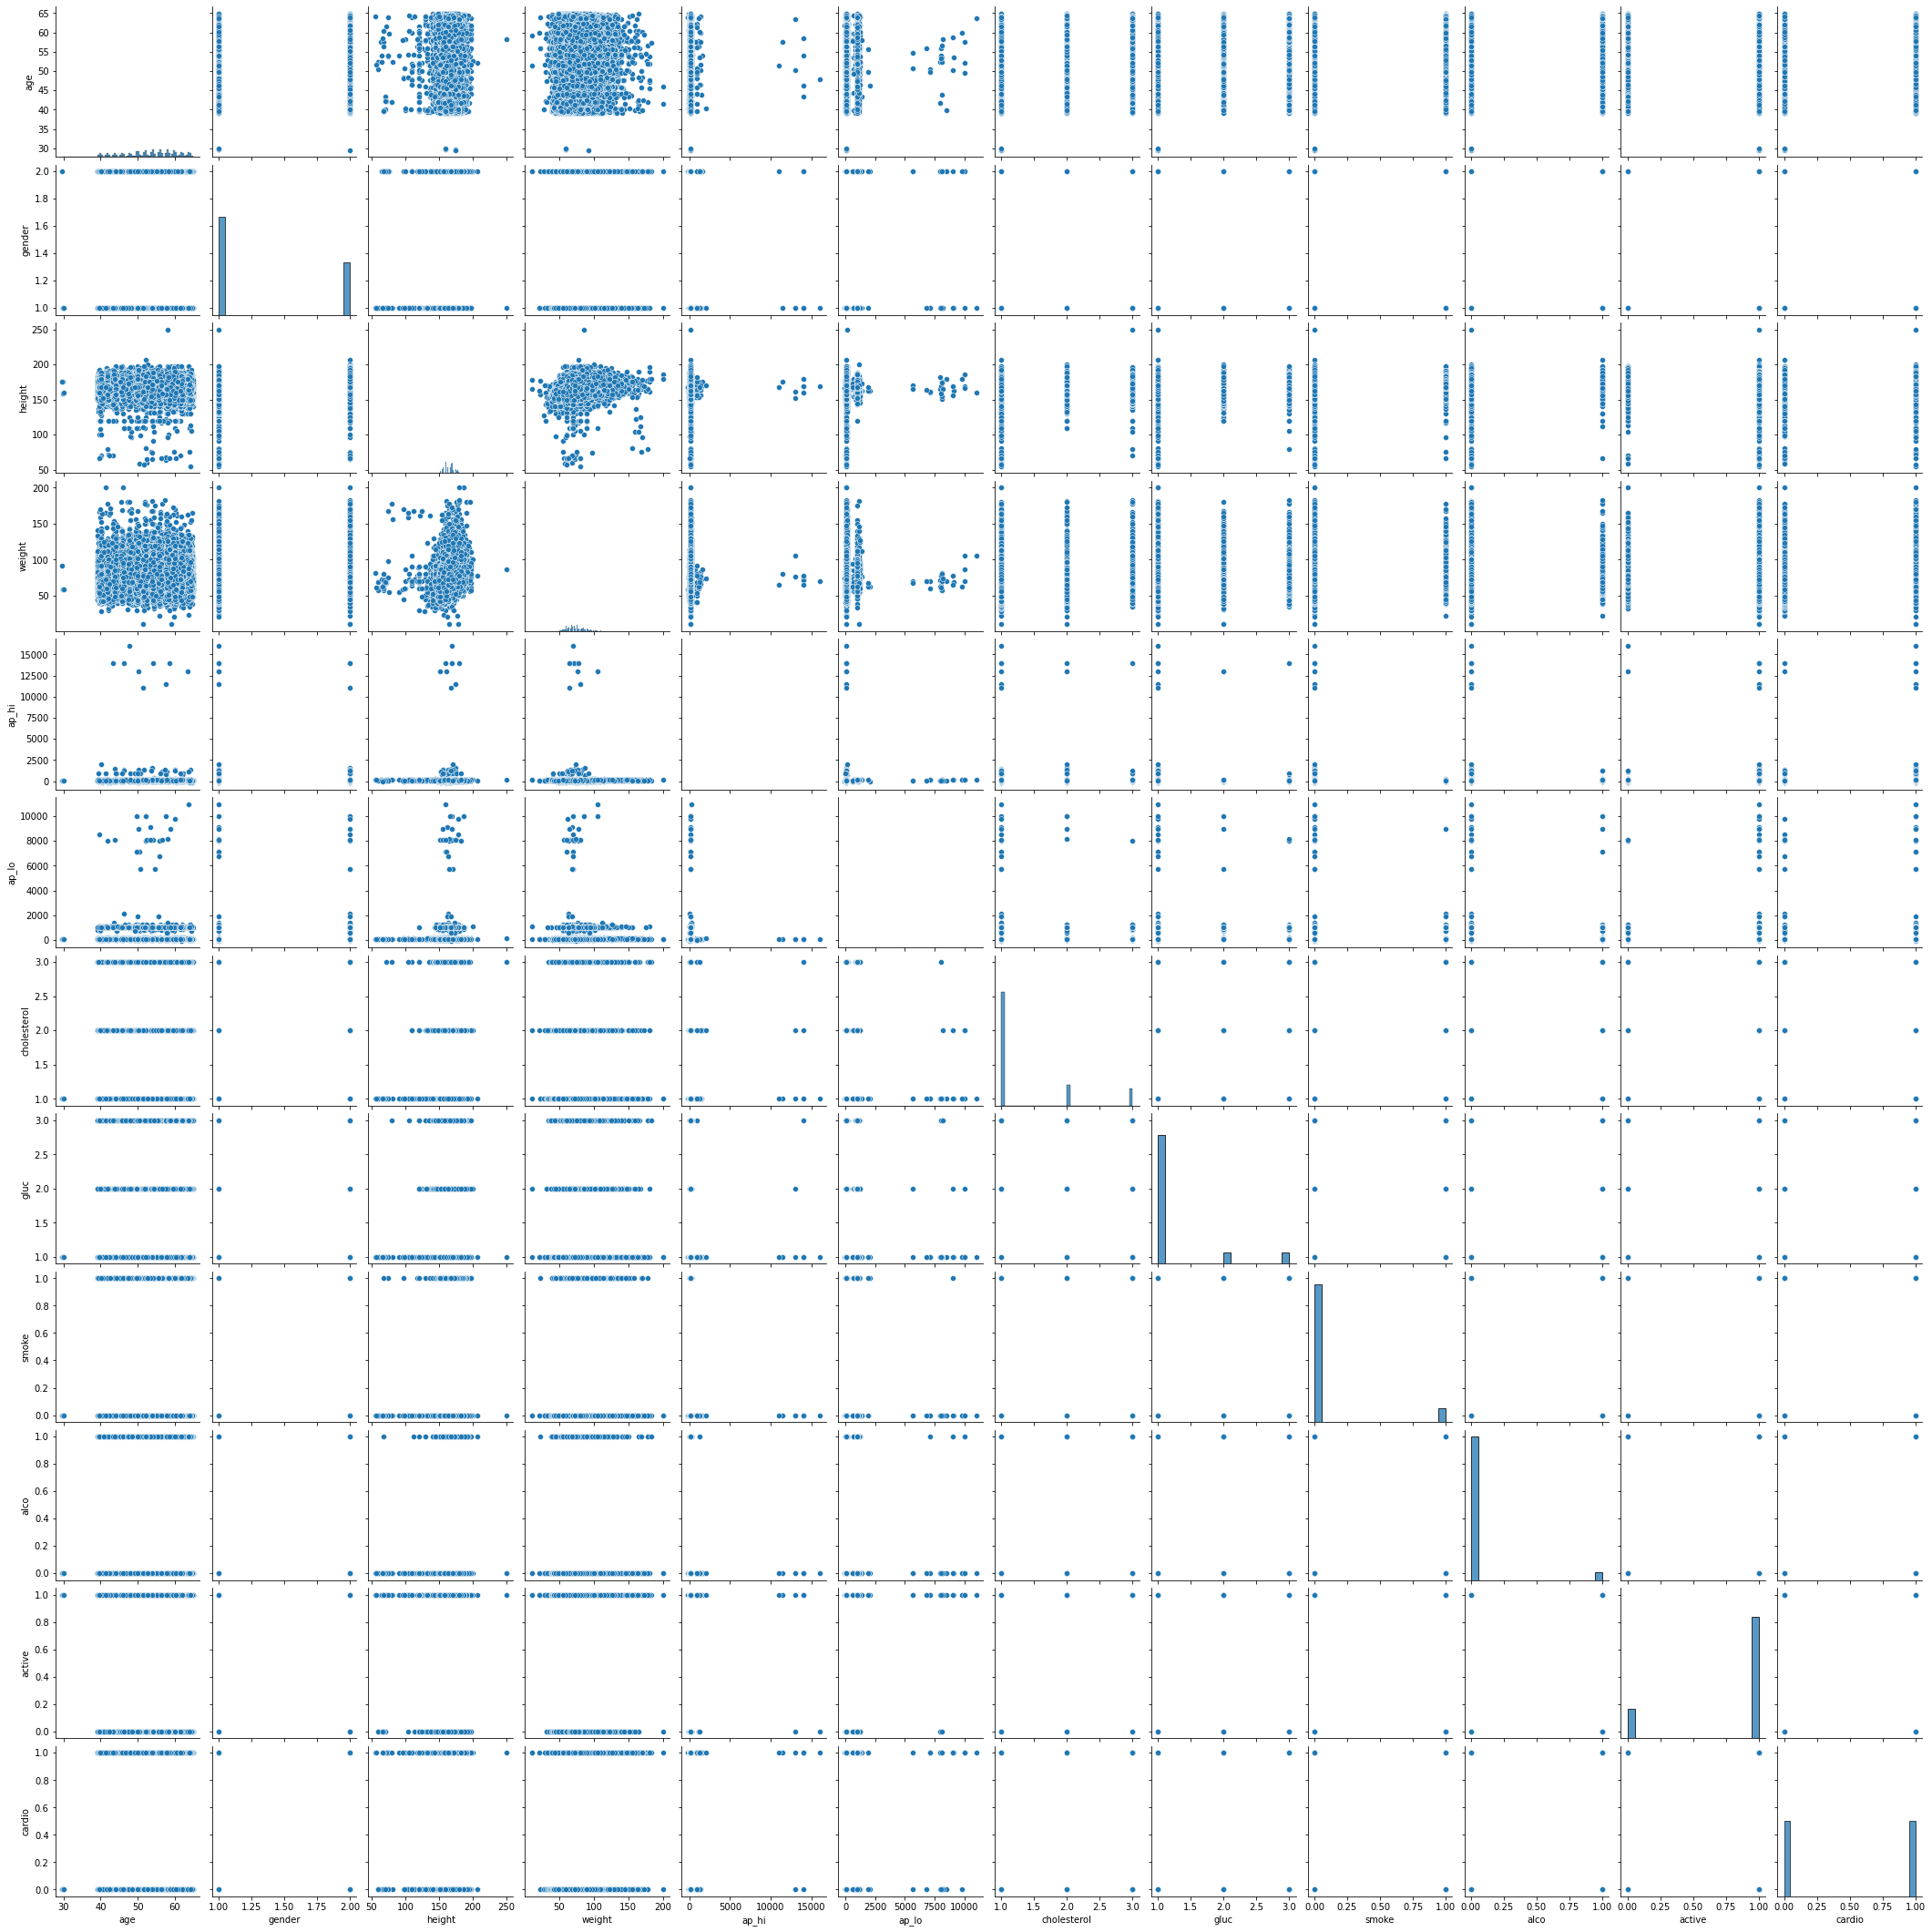

In [10]:
sns.pairplot(cardio_df)

# TASK #5: CREATE TRAINING AND TESTING DATASET

In [11]:
# split the dataframe into target and features

df_target = cardio_df['cardio']
df_features = cardio_df.drop(columns =['cardio'])

In [12]:
cardio_df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [13]:
df_features.shape

(70000, 11)

In [14]:
df_features.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active'],
      dtype='object')

In [15]:
df_target.shape

(70000,)

In [16]:
#spliting the data in to test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size = 0.2)



In [17]:
X_train.shape

(56000, 11)

In [18]:
X_train.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active'],
      dtype='object')

In [19]:
y_train.shape

(56000,)

In [20]:
X_test.shape

(14000, 11)

# TASK #6: TRAIN AND TEST XGBOOST MODEL IN LOCAL MODE

In [21]:
# install xgboost

!pip install xgboost

In [22]:
# use xgboost model in local mode

# note that we have not performed any normalization or scaling since XGBoost is not sensitive to this.
# XGboost is a type of ensemble algorithms and works by selecting thresholds or cut points on features to split a node. 
# It doesn't really matter if the features are scaled or not.


from xgboost import XGBClassifier

# model = XGBClassifier(learning_rate=0.01, n_estimators=100, objective='binary:logistic')
model = XGBClassifier()

model.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:37:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
# make predictions on test data

predict = model.predict(X_test)

In [24]:
predict

array([1, 0, 0, ..., 1, 1, 0])

In [25]:
# print metrics for testing dataset
from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Precision = {}".format(precision_score(y_test, predict)))
print("Recall = {}".format(recall_score(y_test, predict)))
print("Accuracy = {}".format(accuracy_score(y_test, predict)))

Precision = 0.7522620904836194
Recall = 0.6919213660496485
Accuracy = 0.7332142857142857


In [26]:
model.save_model('bst_save_model.json')
model.save_model('model.bst')

# Task #7: write model file to MinIO

In [27]:
!wget https://dl.min.io/client/mc/release/linux-amd64/mc
!chmod +x mc

!./mc config host add myminio http://172.20.3.42:9000 minioadmin minioadmin
!./mc mb myminio/seldon-models/cardio -p

!./mc cp model.bst myminio/seldon-models/cardio/

--2021-09-13 02:37:13--  https://dl.min.io/client/mc/release/linux-amd64/mc
Resolving dl.min.io (dl.min.io)... 178.128.69.202
Connecting to dl.min.io (dl.min.io)|178.128.69.202|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22007808 (21M) [application/octet-stream]
Saving to: ‘mc’

mc                  100%[===================>]  20.99M   519KB/s    in 2m 54s  

2021-09-13 02:40:08 (123 KB/s) - ‘mc’ saved [22007808/22007808]

Added `myminio` successfully.
Bucket created successfully `myminio/seldon-models/cardio`.
model.bst:     264.17 KiB / 264.17 KiB ┃▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓┃ 2.21 MiB/s 0s